In [ ]:
import pandas as pd
import numpy as np

path = '/content/predictive_maintenance.csv'
Maintenance = pd.read_csv(path)
Maintenance.info()

import warnings
warnings.filterwarnings('ignore')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [ ]:
print('Machine Type categories:', Maintenance.Type.unique())
print('Failure Type categories:', Maintenance['Failure Type'].unique())

Machine Type categories: ['M' 'L' 'H']
Failure Type categories: ['No Failure' 'Power Failure' 'Tool Wear Failure' 'Overstrain Failure'
 'Random Failures' 'Heat Dissipation Failure']


In [ ]:
print(Maintenance.isnull().sum())
#No missing values
Maintenance.dtypes

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64


,0
UDI,int64
Product ID,object
Type,object
Air temperature [K],float64
Process temperature [K],float64
Rotational speed [rpm],int64
Torque [Nm],float64
Tool wear [min],int64
Target,int64
Failure Type,object


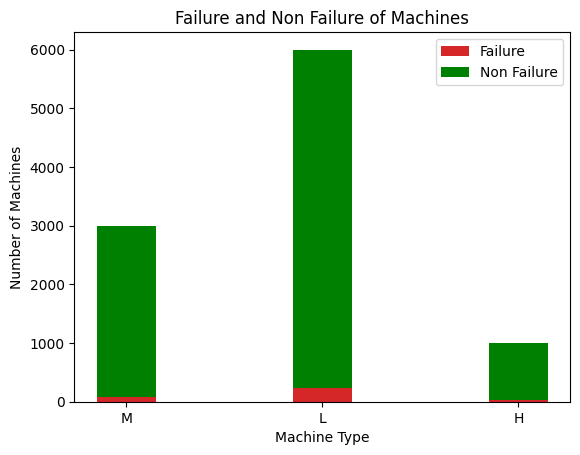

In [ ]:
Maintenance = Maintenance.rename({'Failure Type': 'FailureType','Product ID':'Product_ID','Air temperature [K] ':'Air_temperature','Process temperature [K]':'Process_temperature','Rotational speed [rpm]':'Rotational_speed','Torque [Nm]':'TorqueNm','Tool wear [min]':'Tool_wear'}, axis=1)

import matplotlib.pyplot as plt
# Plot a bar chart showing machine which are Not Failed and Failed by Type of Machine
labels_Failed = ['M', 'L','H']
# Failure by Type
M_Failed = sum(Maintenance.loc[Maintenance['Type']=='M'].Target)
L_Failed = sum(Maintenance.loc[Maintenance['Type']=='L'].Target)
H_Failed = sum(Maintenance.loc[Maintenance['Type']=='H'].Target)
Failed=[M_Failed, L_Failed, H_Failed]

#Non failure by
M_Tot = len(Maintenance.loc[Maintenance['Type']=='M'].Target)
L_Tot = len(Maintenance.loc[Maintenance['Type']=='L'].Target)
H_Tot = len(Maintenance.loc[Maintenance['Type']=='H'].Target)

M_NF = M_Tot-M_Failed
L_NF = L_Tot-L_Failed
H_NF = H_Tot-H_Failed

NFail = [M_NF, L_NF, H_NF]

fig, ax = plt.subplots(1,1)
width = 0.3
ax.bar(labels_Failed, Failed, width, label='Failure',color='tab:Red')
ax.bar(labels_Failed, NFail, width, bottom=Failed,label='Non Failure',color='green')
ax.set_xlabel('Machine Type')
ax.set_ylabel('Number of Machines')
ax.set_title('Failure and Non Failure of Machines')
ax.legend()
plt.show()

In [ ]:
print('Percentage of machines in Non Failure:',round((M_NF+L_NF+H_NF)*100/(M_Tot+L_Tot+H_Tot),1),'%')
print('Percentage of machines which had failure:',round((M_Failed+L_Failed+H_Failed)*100/(M_Tot+L_Tot+H_Tot),1),'%')

Percentage of machines in Non Failure: 96.6 %
Percentage of machines which had failure: 3.4 %


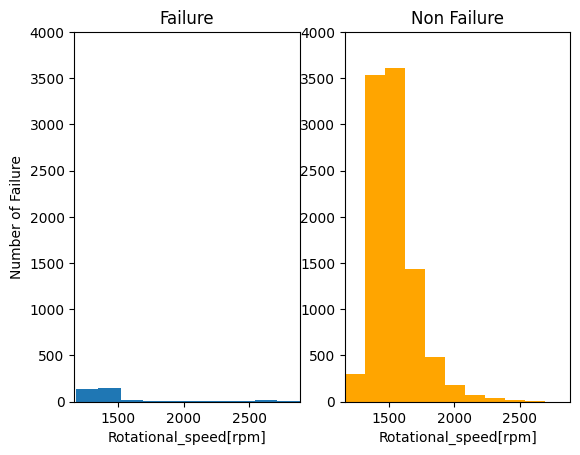

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(Maintenance.loc[Maintenance['Target']==1].Rotational_speed,color='tab:blue')
ax1.set_xlabel('Rotational_speed[rpm]')
ax1.set_ylabel('Number of Failure')
ax1.set_title('Failure')
ax2.hist(Maintenance.loc[Maintenance['Target']==0].Rotational_speed,color='orange')
ax2.set_xlabel('Rotational_speed[rpm]')
ax2.set_title('Non Failure')
# Set the axis limits to be the same for both both plots
xlimits = [min(Maintenance.Rotational_speed), max(Maintenance.Rotational_speed)]
ylimits = [0, 4000]
ax1.set_xlim(xlimits)
ax1.set_ylim(ylimits)
ax2.set_xlim(xlimits)
ax2.set_ylim(ylimits)
plt.show()

In [ ]:
Maintenance = Maintenance.drop(["Product_ID"],axis=1)

In [ ]:
Maintenance['FailureType']=Maintenance['FailureType'].map({'No Failure':0, 'Power Failure':1, 'Tool Wear Failure':2, 'Overstrain Failure':3, 'Random Failures':4, 'Heat Dissipation Failure':5})

In [ ]:
from sklearn import preprocessing

Maintenance['Type']=Maintenance['Type'].map({'M' : 0, 'L' : 1, 'H' : 2})
Maintenance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   UDI                  10000 non-null  int64  
 1   Type                 10000 non-null  int64  
 2   Air temperature [K]  10000 non-null  float64
 3   Process_temperature  10000 non-null  float64
 4   Rotational_speed     10000 non-null  int64  
 5   TorqueNm             10000 non-null  float64
 6   Tool_wear            10000 non-null  int64  
 7   Target               10000 non-null  int64  
 8   FailureType          10000 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 703.2 KB


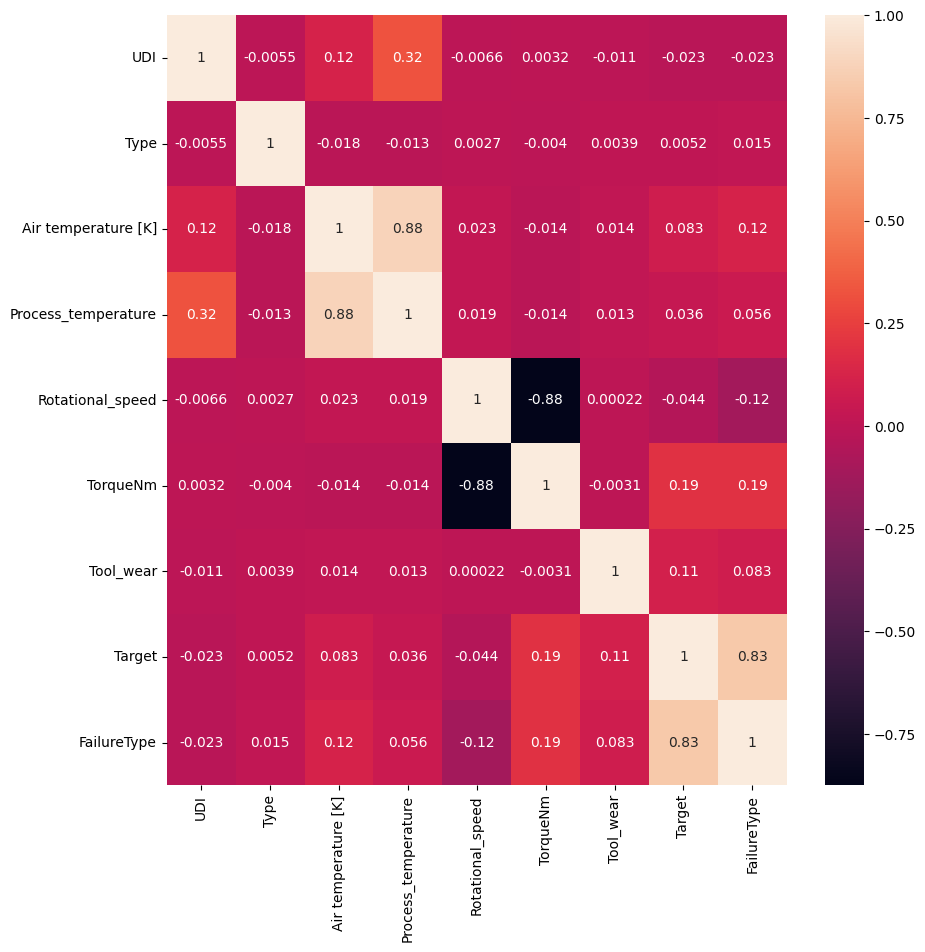

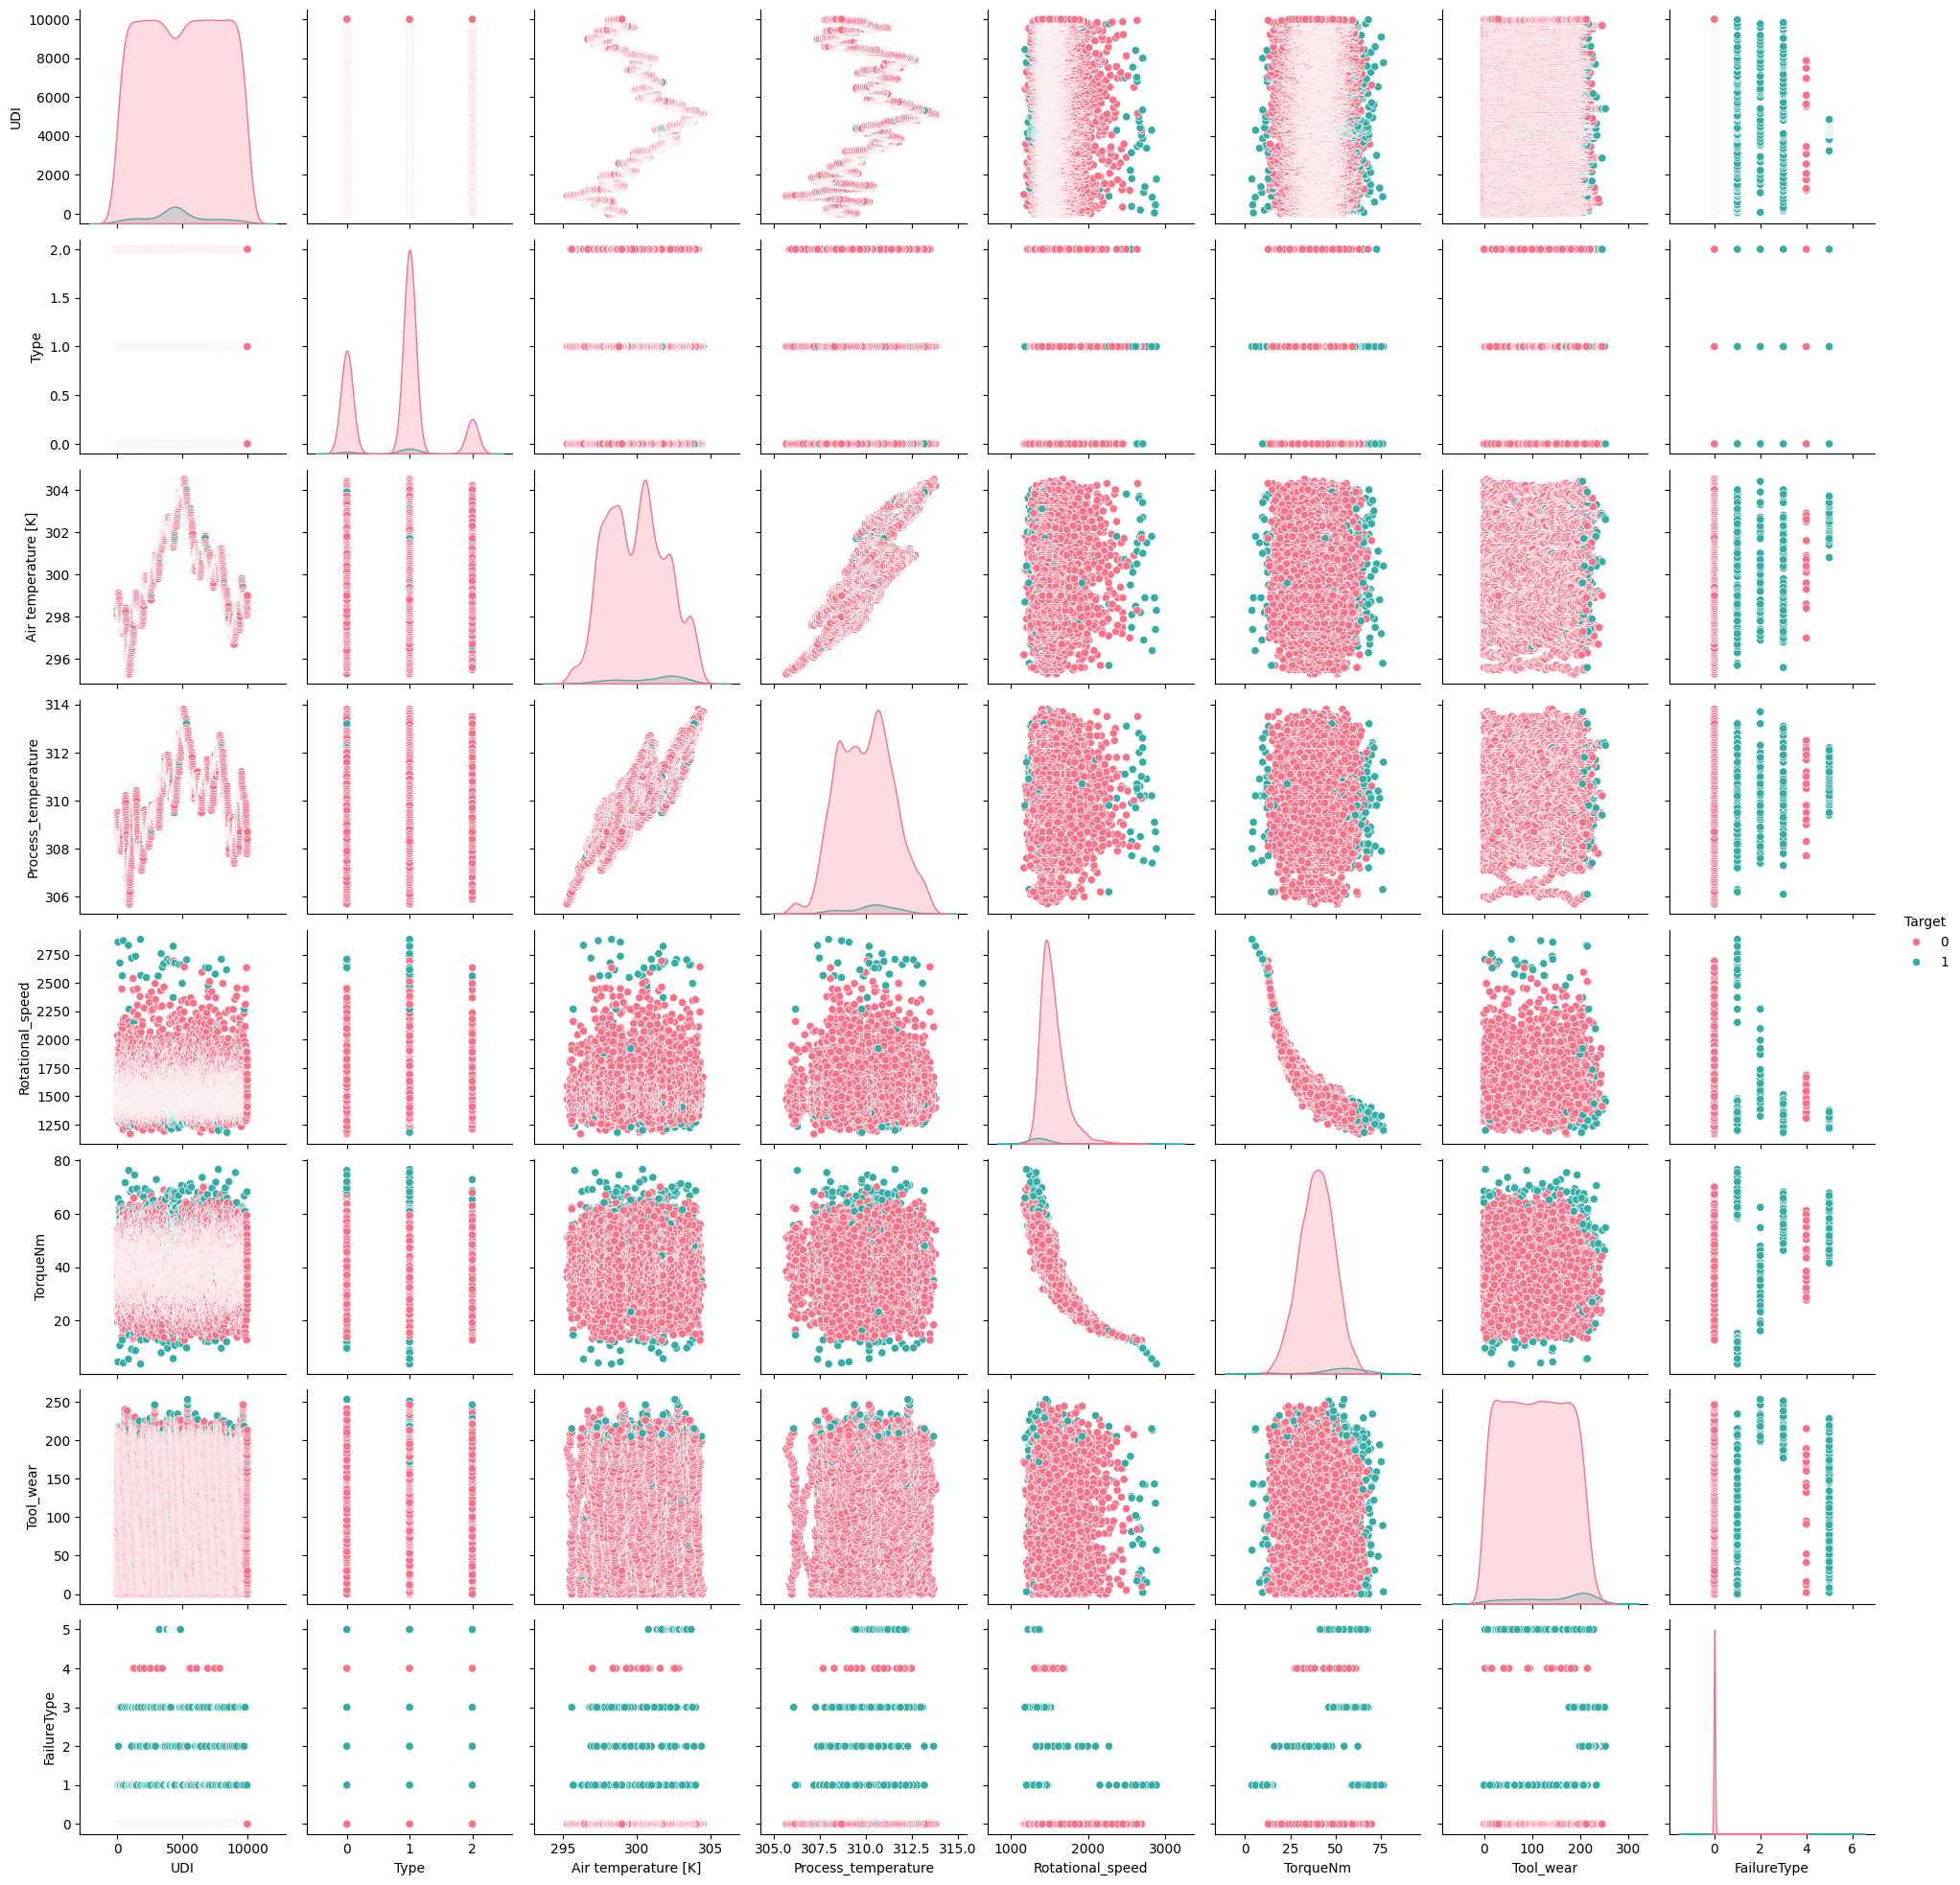

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 10))
#Maintenance_bp=pd.DataFrame(Maintenance_bp,index=[0, 1, 2, 3,4,5,6,7,8,9])
Maintenance_corr=Maintenance.corr()
sns.heatmap(Maintenance_corr, annot=True)

sns.pairplot(Maintenance, hue='Target', palette='husl')

plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Type                 10000 non-null  int64  
 1   Air temperature [K]  10000 non-null  float64
 2   TorqueNm             10000 non-null  float64
 3   Tool_wear            10000 non-null  int64  
 4   Target               10000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 390.8 KB


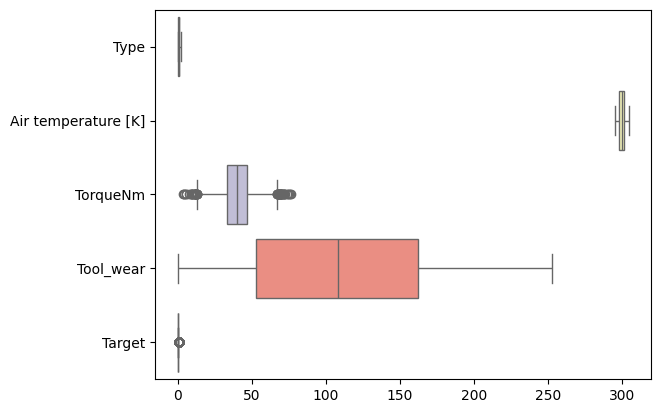

In [ ]:
Maintenance_1 = Maintenance.drop(columns=['UDI','FailureType','Rotational_speed','Process_temperature'])
sns.boxplot(data=Maintenance_1, orient="h", palette="Set3")
Maintenance_1.info()
#There are no outliers

In [ ]:
import pandas as pd
# Go through each input feature checking if there are any (and how many) NaNs
main_Features = Maintenance_1.columns.tolist() # Make a list of the feature names
print(main_Features)
for feature in main_Features:
    num = 0
    for i in range(0,len(Maintenance_1)):
        if pd.isnull(Maintenance_1.iloc[i][feature]) == True:
            num = num + 1
    print('NaNs for', feature ,'is', num)
#There are no NANs in the dataset

['Type', 'Air temperature [K]', 'TorqueNm', 'Tool_wear', 'Target']
NaNs for Type is 0
NaNs for Air temperature [K] is 0
NaNs for TorqueNm is 0
NaNs for Tool_wear is 0
NaNs for Target is 0


In [ ]:
#Splitting data to train and test
from sklearn.model_selection import train_test_split
X=Maintenance_1.drop(['Target'],axis=1) # All Input variables except target variable
X_names = main_Features[1:] # Remove 'Target' from feature names
y= Maintenance_1['Target'] # Target variable
y_names=['No Failure','Failure'] # Target labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.28, random_state=1000, stratify=y)

In [ ]:
#Random Forest
from sklearn.model_selection import cross_val_score
import math
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
maintenace_forest = RandomForestClassifier(n_estimators=15,bootstrap=True,max_features=4,criterion='gini',max_depth=None,random_state=1000,oob_score=True)
maintenace_forest.fit(X_train,y_train)
y_pred_train = maintenace_forest.predict(X_train)
print("Accuracy on training set:",metrics.accuracy_score(y_train, y_pred_train))
y_pred_test = maintenace_forest.predict(X_test)
print("Accuracy on test set:",metrics.accuracy_score(y_test, y_pred_test))
print("OOB score:",maintenace_forest.oob_score_) # Alternative to test set validation method

Accuracy on training set: 0.9981941936380053
Accuracy on test set: 0.9739378793288112
OOB score: 0.9733296291151549


In [ ]:
print("f1 score on training set: ",metrics.f1_score(y_train, y_pred_train))
print("f1 score on testing set: ",metrics.f1_score(y_test, y_pred_test))

f1 score on training set:  0.9727463312368972
f1 score on testing set:  0.5228758169934641


In [ ]:
!pip install scikit-learn

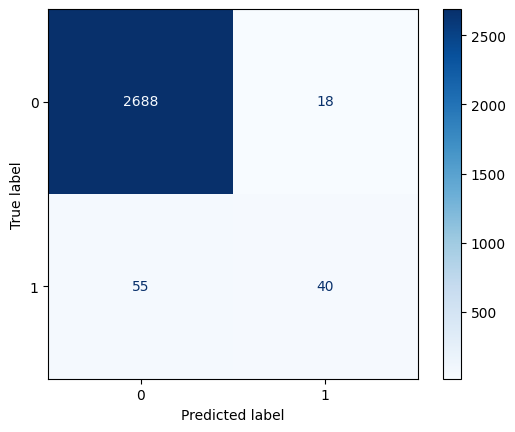

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have your predictions
y_pred = maintenace_forest.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=maintenace_forest.classes_)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.backend import clear_session

# Clear previous data from Artificial Neural Network used before
clear_session()

# Input dimenstion (Number of features)
input_dim = 4

model = Sequential()
# The input layer is not explicitly added and defined in the input_dim
model.add(layers.Dense(4, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
#
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25 (100.00 B)

 Trainable params: 25 (100.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
Maintenance = model.fit(X_train, y_train, epochs=15, verbose=True, validation_split=0.3, batch_size=50)

Epoch 1/15
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.0346 - loss: 91.2357 - val_accuracy: 0.0380 - val_loss: 44.5807
Epoch 2/15
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0852 - loss: 28.8781 - val_accuracy: 0.9602 - val_loss: 0.3255
Epoch 3/15
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9695 - loss: 0.2548 - val_accuracy: 0.9593 - val_loss: 0.2999
Epoch 4/15
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9669 - loss: 0.2474 - val_accuracy: 0.9602 - val_loss: 0.2727
Epoch 5/15
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9640 - loss: 0.2504 - val_accuracy: 0.9616 - val_loss: 0.2416
Epoch 6/15
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9659 - loss: 0.2100 - val_accuracy: 0.9616 - val_loss: 0.2098
Epoch 7/15
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9679 - loss: 0.1793 - val_accuracy: 0.9620 - val_loss: 0.1808
Epoch 8/15
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9701 - loss: 0.1409 - val_accuracy

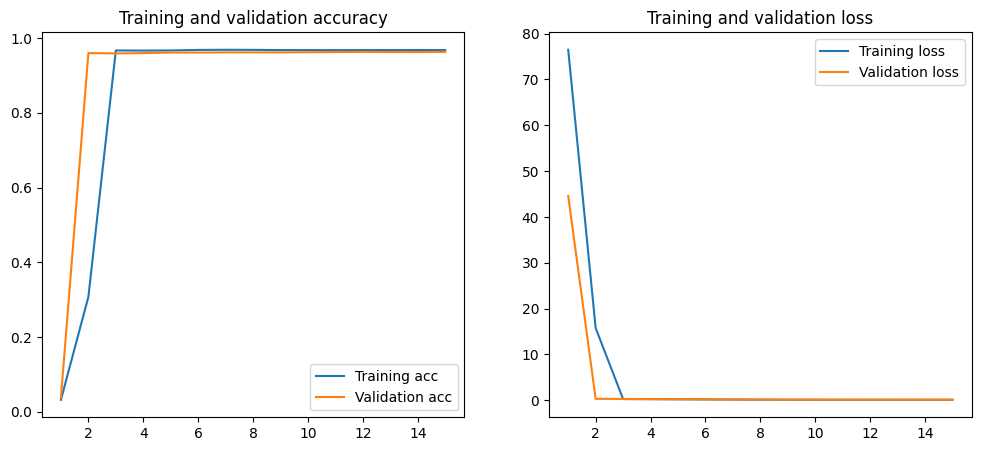

In [ ]:
def plot_history(Maintenance):
    acc = Maintenance.history['accuracy']
    val_acc = Maintenance.history['val_accuracy']
    loss = Maintenance.history['loss']
    val_loss = Maintenance.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, label='Training acc')
    plt.plot(x, val_acc, label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, label='Training loss')
    plt.plot(x, val_loss, label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

plot_history(Maintenance)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 500)                 │           5,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 500)                 │         250,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 500)                 │         250,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             501 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 507,051 (1.93 MB)

 Trainable params: 507,051 (1.93 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9690 - loss: 0.2393 - val_accuracy: 0.9620 - val_loss: 0.1574
Epoch 2/500
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9671 - loss: 0.1412 - val_accuracy: 0.9620 - val_loss: 0.1431
Epoch 3/500
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9694 - loss: 0.1200 - val_accuracy: 0.9644 - val_loss: 0.1371
Epoch 4/500
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9733 - loss: 0.0951 - val_accuracy: 0.9667 - val_loss: 0.1261
Epoch 5/500
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9733 - loss: 0.1006 - val_accuracy: 0.9699 - val_loss: 0.1219
Epoch 6/500
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9719 - loss: 0.1113 - val_accuracy: 0.9676 - val_loss: 0.1199
Epoch 7/500
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9714 - loss: 0.1020 - val_accuracy: 0.9648 - val_loss: 0.1423
Epoch 8/500
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9712 - loss: 0.1102 - val_accuracy: 0.9676 - 

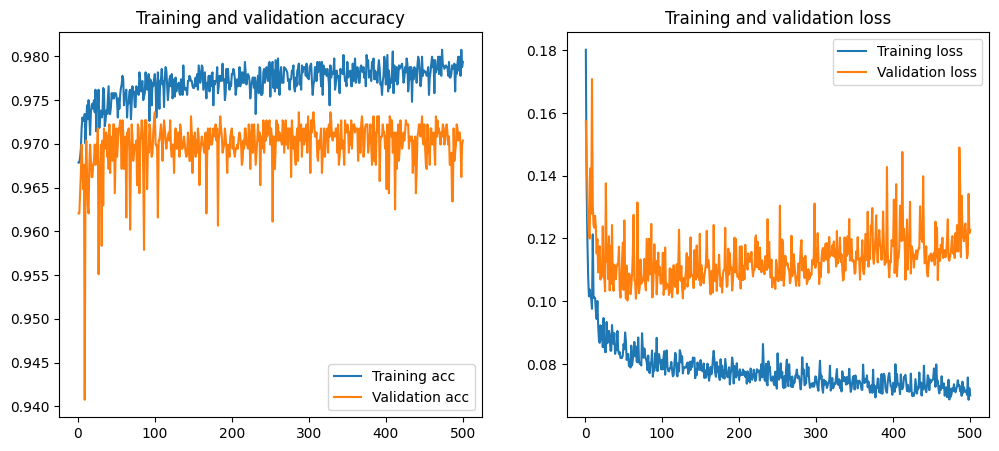

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.backend import clear_session

clear_session()


input_dim = X_train.shape[1]

model_2 = Sequential()

model_2.add (layers.Dense(10, input_dim=input_dim, activation='relu'))
model_2.add(layers.Dense(500, activation='tanh'))
model_2.add(layers.Dense(500, activation='sigmoid'))
model_2.add(layers.Dense(500, activation='relu'))
model_2.add(layers.Dense(1, activation='sigmoid'))
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_2.summary()
# Train the model
Maintenance1 = model_2.fit(X_train, y_train, epochs=500, verbose=True, validation_split=0.3, batch_size=100)
# Evaluate the model
loss, accuracy = model_2.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model_2.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(Maintenance1)

In [ ]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Create a BalancedBaggingClassifier with a DecisionTreeClassifier as the base estimator
Maintenance_Balance = BalancedBaggingClassifier(
    n_estimators=500,
    estimator=DecisionTreeClassifier(),  # Use 'estimator' instead of 'base_estimator'
    sampling_strategy='not majority',
    replacement=False,
    random_state=50
)

# Fit the model
Maintenance_Balance.fit(X_train, y_train)

# Make predictions
preds_train = Maintenance_Balance.predict(X_train)
preds_test = Maintenance_Balance.predict(X_test)


In [ ]:
print("Accuracy on training set:",metrics.accuracy_score(y_train, preds_train))
print("Accuracy on test set:",metrics.accuracy_score(y_test, preds_test))

Accuracy on training set: 1.0
Accuracy on test set: 0.9757229560871118


F1 Score for training set: 1.00


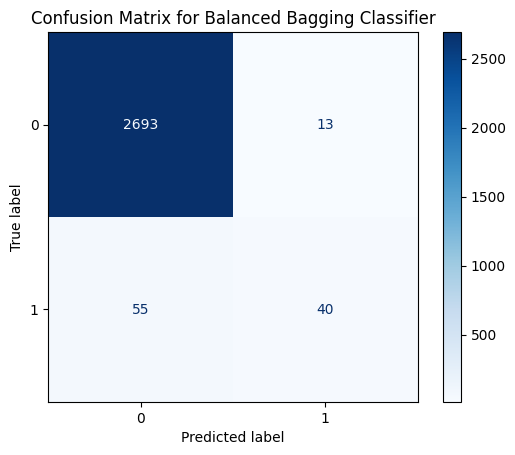

F1 Score for test set: 0.54


In [ ]:
f1_train = metrics.f1_score(y_train, preds_train)
print(f'F1 Score for training set: {f1_train:.2f}')

# Make predictions on the test set
preds_test = Maintenance_Balance.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, preds_test)

# Create a confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Maintenance_Balance.classes_)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Balanced Bagging Classifier')
plt.show()

# Calculate and print F1 score for the test set
f1_test = metrics.f1_score(y_test, preds_test)
print(f'F1 Score for test set: {f1_test:.2f}')

#f Balance Bagging classifiere F1 Scores is 100% and 54% after using 500 number of estimators for train and test respectively

In [ ]:
import numpy as np

# Function to create synthetic test samples with 4 features
def generate_test_samples(num_samples=5):
    test_samples = []
    for _ in range(num_samples):
        sample = [
            0,
            np.random.uniform(298.0, 310.0),       # Air_temperature
            np.random.uniform(40.0, 50.0),         # TorqueNm
            np.random.uniform(0, 300)              # Tool_wear
        ]
        test_samples.append(sample)
    return np.array(test_samples)

# Generate 5 random test samples
random_test_samples = generate_test_samples(num_samples=5)

# Predict and display each sample's result
for i, test_sample in enumerate(random_test_samples, 1):
    test_sample = test_sample.reshape(1, -1)  # Reshape to match model input
    prediction = model_2.predict(test_sample)
    predicted_label = "Failure" if prediction[0][0] >= 0.5 else "No Failure"
    print(f"Test Sample {i}: {test_sample.flatten()}")
    print(f"Prediction: {predicted_label}\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Test Sample 1: [  0.         307.8603271   43.34823465 127.42309525]
Prediction: No Failure

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Test Sample 2: [  0.         298.77986303  41.89411203  62.27120045]
Prediction: No Failure

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Test Sample 3: [  0.         303.64408981  49.54206282   0.92328381]
Prediction: No Failure

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Test Sample 4: [  0.         305.39396155  43.96783802 164.00664409]
Prediction: No Failure

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Test Sample 5: [  0.         300.10458637  48.27514616 259.72172317]
Prediction: Failure



In [ ]:
import numpy as np

# Function to create synthetic test samples with 4 features
def generate_test_samples(num_samples=5):
    test_samples = []
    for _ in range(num_samples):
        sample = [
            1,
            np.random.uniform(298.0, 310.0),       # Air_temperature
            np.random.uniform(40.0, 50.0),         # TorqueNm
            np.random.uniform(0, 300)              # Tool_wear
        ]
        test_samples.append(sample)
    return np.array(test_samples)

# Generate 5 random test samples
random_test_samples = generate_test_samples(num_samples=5)

# Predict and display each sample's result
for i, test_sample in enumerate(random_test_samples, 1):
    test_sample = test_sample.reshape(1, -1)  # Reshape to match model input
    prediction = model_2.predict(test_sample)
    predicted_label = "Failure" if prediction[0][0] >= 0.5 else "No Failure"
    print(f"Test Sample {i}: {test_sample.flatten()}")
    print(f"Prediction: {predicted_label}\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Test Sample 1: [  1.         304.40837083  43.1866457  230.34312623]
Prediction: No Failure

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Test Sample 2: [  1.         304.63549527  40.3365048   89.71493955]
Prediction: No Failure

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Test Sample 3: [  1.         299.47090025  42.44317256  40.92023694]
Prediction: No Failure

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Test Sample 4: [  1.         309.17619256  41.98262525 162.78995506]
Prediction: No Failure

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Test Sample 5: [  1.         302.77950028  43.5911945  162.89976286]
Prediction: No Failure



In [ ]:
import numpy as np

# Function to create synthetic test samples with 4 features
def generate_test_samples(num_samples=5):
    test_samples = []
    for _ in range(num_samples):
        sample = [
            2,
            np.random.uniform(298.0, 310.0),       # Air_temperature
            np.random.uniform(40.0, 50.0),         # TorqueNm
            np.random.uniform(0, 300)              # Tool_wear
        ]
        test_samples.append(sample)
    return np.array(test_samples)

# Generate 5 random test samples
random_test_samples = generate_test_samples(num_samples=5)

# Predict and display each sample's result
for i, test_sample in enumerate(random_test_samples, 1):
    test_sample = test_sample.reshape(1, -1)  # Reshape to match model input
    prediction = model_2.predict(test_sample)
    predicted_label = "Failure" if prediction[0][0] >= 0.5 else "No Failure"
    print(f"Test Sample {i}: {test_sample.flatten()}")
    print(f"Prediction: {predicted_label}\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Test Sample 1: [  2.         307.40111244  44.56701883 236.37935642]
Prediction: No Failure

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Test Sample 2: [  2.         302.05819494  42.03128321 215.33817108]
Prediction: No Failure

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Test Sample 3: [  2.         304.24739731  45.37718883  27.92262402]
Prediction: No Failure

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Test Sample 4: [  2.         306.26507345  45.49664761 181.17278436]
Prediction: No Failure

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Test Sample 5: [  2.         307.29579061  44.49647044 220.79082238]
Prediction: No Failure



In [ ]:
import numpy as np

# Define a specific test sample with chosen values
test_sample = np.array([
    1,
    305.0,  # Air_temperature
    45.0,   # TorqueNm
    150     # Tool_wear
])

# Reshape the test sample to match model input (1 sample, 4 features)
test_sample = test_sample.reshape(1, -1)

# Predict using the model
prediction = model_2.predict(test_sample)
predicted_label = "Failure" if prediction[0][0] >= 0.5 else "No Failure"

print("Test Sample:", test_sample.flatten())
print("Prediction:", predicted_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Test Sample: [  1. 305.  45. 150.]
Prediction: No Failure
